# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

cities

Number of cities in the list: 615


['port elizabeth',
 'asau',
 'vaini',
 'ponta delgada',
 'barrow',
 'port lincoln',
 'arraial do cabo',
 'port alfred',
 'hobart',
 'one hundred mile house',
 'ponta do sol',
 'maragogi',
 'batagay',
 'mataura',
 'kodiak',
 'namibe',
 'punta arenas',
 'puerto ayora',
 'mar del plata',
 'tokonou',
 'hithadhoo',
 'jamestown',
 'marawi',
 'abnub',
 'rikitea',
 'buqayq',
 'sao filipe',
 'sentyabrskiy',
 'broome',
 'manjo',
 'new norfolk',
 'college',
 'podor',
 'saint-philippe',
 'waw',
 'dikson',
 'mahebourg',
 'isangel',
 'ushuaia',
 'coihaique',
 'muros',
 'luba',
 'qaanaaq',
 'castro',
 'hilo',
 'goya',
 'cidreira',
 'noumea',
 'rutland',
 'tessalit',
 'toora-khem',
 'belushya guba',
 'taolanaro',
 'touros',
 'nikolskoye',
 'ugoofaaru',
 'hualmay',
 'tasiilaq',
 'teguise',
 'nizhneyansk',
 'cherskiy',
 'tombouctou',
 'albany',
 'whitehorse',
 'holme',
 'oksbol',
 'umzimvubu',
 'rusape',
 'rokytne',
 'gorno-chuyskiy',
 'kaduqli',
 'bluff',
 'shimoda',
 'hambantota',
 'casper',
 'meulabo

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | asau
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | ponta delgada
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | port lincoln
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | one hundred mile house
City not found. Skipping...
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | maragogi
Processing Record 13 of Set 1 | batagay
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | namibe
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | tokonou
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 

Processing Record 39 of Set 4 | korla
Processing Record 40 of Set 4 | kokopo
Processing Record 41 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | atasu
Processing Record 44 of Set 4 | biak
Processing Record 45 of Set 4 | chuy
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | kahului
Processing Record 49 of Set 4 | yeppoon
Processing Record 0 of Set 5 | hutchinson
Processing Record 1 of Set 5 | vila franca do campo
Processing Record 2 of Set 5 | shelburne
Processing Record 3 of Set 5 | havre-saint-pierre
Processing Record 4 of Set 5 | cockburn town
Processing Record 5 of Set 5 | sitka
Processing Record 6 of Set 5 | san policarpo
Processing Record 7 of Set 5 | mnogovershinnyy
Processing Record 8 of Set 5 | zaragoza
Processing Record 9 of Set 5 | harunabad
Processing Record 10 of Set 5 | olafsvik
Processing Record 11 of Set 5 | zilupe
Processing Record 12 of 

Processing Record 31 of Set 8 | utiroa
City not found. Skipping...
Processing Record 32 of Set 8 | raudeberg
Processing Record 33 of Set 8 | san rafael
Processing Record 34 of Set 8 | bathurst
Processing Record 35 of Set 8 | wajima
Processing Record 36 of Set 8 | chicama
Processing Record 37 of Set 8 | xichang
Processing Record 38 of Set 8 | tomatlan
Processing Record 39 of Set 8 | luderitz
Processing Record 40 of Set 8 | severnyy
Processing Record 41 of Set 8 | rajpura
Processing Record 42 of Set 8 | orlik
Processing Record 43 of Set 8 | shalyhyne
Processing Record 44 of Set 8 | burica
City not found. Skipping...
Processing Record 45 of Set 8 | chaochou
City not found. Skipping...
Processing Record 46 of Set 8 | lompoc
Processing Record 47 of Set 8 | panguipulli
Processing Record 48 of Set 8 | shache
Processing Record 49 of Set 8 | izhma
Processing Record 0 of Set 9 | ofunato
Processing Record 1 of Set 9 | bayreuth
Processing Record 2 of Set 9 | panguna
Processing Record 3 of Set 9 | 

Processing Record 19 of Set 12 | pospelikha
Processing Record 20 of Set 12 | diego de almagro
Processing Record 21 of Set 12 | bitung
Processing Record 22 of Set 12 | kattivakkam
Processing Record 23 of Set 12 | butembo
Processing Record 24 of Set 12 | san felipe
Processing Record 25 of Set 12 | rabak
Processing Record 26 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 27 of Set 12 | catamarca
Processing Record 28 of Set 12 | bethlehem
Processing Record 29 of Set 12 | pella
Processing Record 30 of Set 12 | san quintin
Processing Record 31 of Set 12 | nyuksenitsa
Processing Record 32 of Set 12 | beringovskiy
Processing Record 33 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 34 of Set 12 | bonavista
Processing Record 35 of Set 12 | rafraf
Processing Record 36 of Set 12 | inongo
Processing Record 37 of Set 12 | mragowo
Processing Record 38 of Set 12 | kapit
Processing Record 39 of Set 12 | maningrida
Processing Record 40 of Set 12 | aksarka
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,290.98,91,20,4.63,ZA,1670265616
1,asau,46.4333,26.4000,271.66,99,100,1.47,RO,1670265617
2,vaini,-21.2000,-175.2000,297.24,94,75,2.06,TO,1670265617
3,ponta delgada,37.7333,-25.6667,290.10,82,75,7.72,PT,1670265617
4,barrow,71.2906,-156.7887,276.16,70,0,14.40,US,1670265618


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,290.98,91,20,4.63,ZA,1670265616
1,asau,46.4333,26.4000,271.66,99,100,1.47,RO,1670265617
2,vaini,-21.2000,-175.2000,297.24,94,75,2.06,TO,1670265617
3,ponta delgada,37.7333,-25.6667,290.10,82,75,7.72,PT,1670265617
4,barrow,71.2906,-156.7887,276.16,70,0,14.40,US,1670265618


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

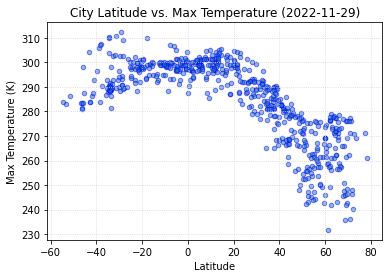

In [46]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = "Lat", y = "Max Temp", edgecolors="blue", alpha = 0.5)
plt.title("City Latitude vs. Max Temperature (2022-11-29)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.grid (b=True,which="major",axis="both",linestyle=":",color="lightgrey")


# Save the figure
plt.savefig("../output_data/Fig1_Lat_VS_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

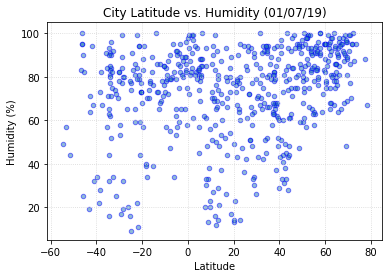

<Figure size 432x288 with 0 Axes>

In [25]:
city_data_df.plot.scatter(x = "Lat", y = "Humidity",edgecolors="blue", alpha = 0.5)
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(5,105)
plt.grid (b=True,which="major",axis="both",linestyle=":",color="lightgrey")
plt.show()

# Save the figure
plt.savefig("../output_data/Fig2_Lat_VS_Hum.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

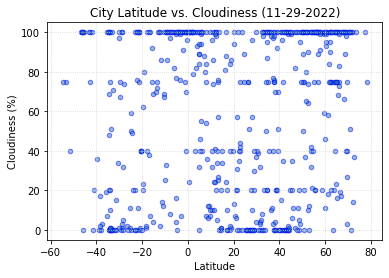

<Figure size 432x288 with 0 Axes>

In [27]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = "Lat", y = "Cloudiness", edgecolors="blue", alpha = 0.5, xlabel = "Latitude", 
                        ylabel = "Cloudiness (%)", title = "City Latitude vs. Cloudiness (11-29-2022)" )
plt.grid (b=True,which="major",axis="both",linestyle=":",color="lightgrey")

plt.show()

# Save the figure
plt.savefig("../output_data/Fig3_Lat_VS_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

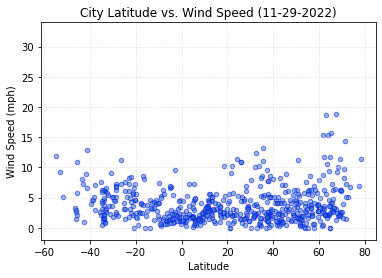

In [29]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = "Lat" , y = "Wind Speed", edgecolors="blue", alpha = 0.5, xlabel = "Latitude", 
                        ylabel = "Wind Speed (mph)", title = "City Latitude vs. Wind Speed (11-29-2022)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle=":",color="lightgrey")


# Save the figure
plt.savefig("../output_data/Fig4_Lat_VS_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [10]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,asau,46.4333,26.4000,271.66,99,100,1.47,RO,1670265617
3,ponta delgada,37.7333,-25.6667,290.10,82,75,7.72,PT,1670265617
4,barrow,71.2906,-156.7887,276.16,70,0,14.40,US,1670265618
9,ponta do sol,32.6667,-17.1000,292.50,75,98,2.27,PT,1670265619
11,batagay,67.6333,134.6333,245.41,98,100,1.34,RU,1670265619


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,290.98,91,20,4.63,ZA,1670265616
2,vaini,-21.2000,-175.2000,297.24,94,75,2.06,TO,1670265617
5,port lincoln,-34.7333,135.8667,288.16,71,100,6.24,AU,1670265618
6,arraial do cabo,-22.9661,-42.0278,302.13,65,20,8.23,BR,1670265618
7,port alfred,-33.5906,26.8910,288.81,90,0,0.89,ZA,1670265610


###  Temperature vs. Latitude Linear Regression Plot

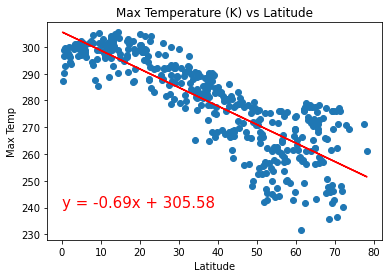

In [45]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temperature (K) vs Latitude', 'Max Temp', (0,240))

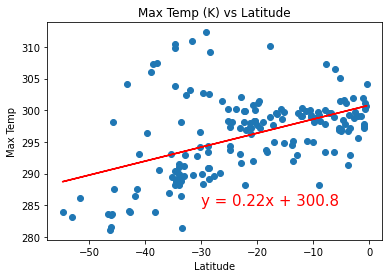

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp (K) vs Latitude', 'Max Temp', (-30,285))


**Discussion about the linear relationship:** This chart shows a great correlation between temperature and latitude. As one moves farther away from the equator the max temperatures decrease. The northern hemisphere has a pretty tight dispersion in comparison to the southern hemisphere but this linear regression is reasonably useful for predictive stats.

### Humidity vs. Latitude Linear Regression Plot

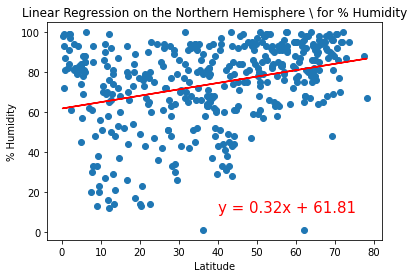

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity', (40,10))


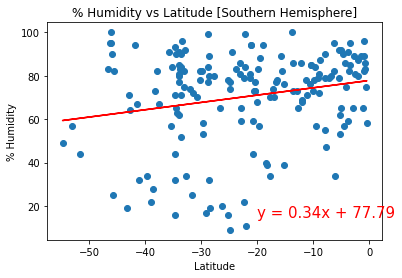

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"] 
plot_linear_regression(x_values, y_values, '% Humidity vs Latitude [Southern Hemisphere]', '% Humidity', (-20,15))

**Discussion about the linear relationship:** These regression lines are actually not as accurate as I would have thought. Cold air will have a higher percent humidity, therefore the Northern hemisphere chart shows what one could expect. However the southern hemisphere chart shows relative humidity getting lower as you move farther away from the equator. I would have expected the opposite.

### Cloudiness vs. Latitude Linear Regression Plot

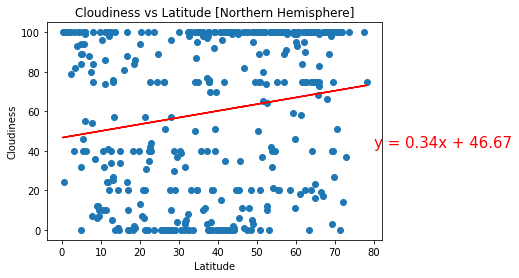

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,'Cloudiness vs Latitude [Northern Hemisphere]', 'Cloudiness', (80,42) )

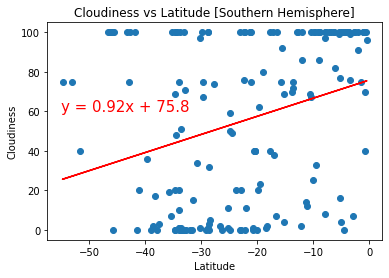

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,'Cloudiness vs Latitude [Southern Hemisphere]', 'Cloudiness', (-55,60) )

**Discussion about the linear relationship:** The two charts do not show much correlation at all. Using this data it would lead one to believe that the Northern Hemisphere is cloudier than the southern hemisphere. However there are too many outliers to make an assumption like that. There are plenty of data entries with 100% cloud cover as well as 0%cloud cover. the average may be 50% cloud cover but weather does not work like that.

### Wind Speed vs. Latitude Linear Regression Plot

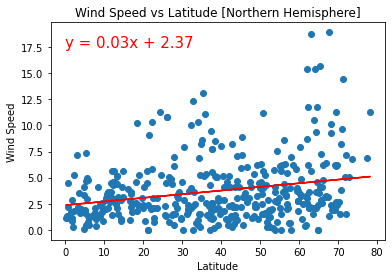

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,'Wind Speed vs Latitude [Northern Hemisphere]', 'Wind Speed', (0,17.5) )

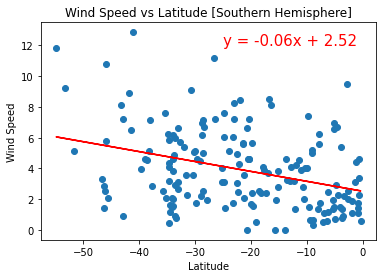

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,'Wind Speed vs Latitude [Southern Hemisphere]', 'Wind Speed', (-25,12) )

**Discussion about the linear relationship:** There is not a very clear relationship between wind speed and Latitude. The one piece of information that this analysis provides is that the wind speed will be lowest at the equator and get progressively stronger as you move towards either pole North or South. However the correlation is not very strong so it would not make sense to use this information as fact. 